# Why I use Python and yellowbrick for my data science project
------
Before you start your first data science project, a valid question to ask is "what programming language should I use"? KDnugget which is a famouse data science related websites ran several surveys to ask Data Scientists which are their favorite programming language. Here are their results:

![KDnugget](programming_language_data_science_kdnugget.jpg)

Source: KDnugget (https://www.kdnuggets.com/2017/05/poll-analytics-data-science-machine-learning-software-leaders.html)

As we can see from the picture, the top two programming languages used are Python and R with Python catching up very quickly.

## What are Python and R?
------
Now you know that both Python and R are used a lot by Data Scientists. You might want to know more about them. The definition from Wikipedia for Python is "an interpreted high-level programming language for general-purpose programming" [1] and for R is "a programming language and free software environment for statistical computing and graphics that is supported by the R Foundation for Statistical Computing" [2]. Generally speaking, Python is a general-purpose programming language which can be used in lots of applications like Web development, Game development, desktop GUIs, software developments and more. R is a specialized programming language mainly used for statistical computing. Although there are some packages in R that you can use to do Web development [3] too, but they are less flexible.    

## Why I use Python for my data science projects
There are lots of articles discussed about which programming lanaguage should be used for data science projects [4-5]: R or Python?. However, none of them have an actual decision yet for both of them have their pros and cons. I think it all depends on you. which one is easier for you to adapt, which one is more convenient for you? 

As for me, I started to use R first, then I decided to use Python more in my recent projects. There are several reasons:
1. Python is a general-purpose programming language, it's very easy to extend it's function to other developments and could make it easier to deploy my model easier to other platforms.
2. The OOP(Object Oriented Programming) concept in Python makes me easier to understand and adapt to other OOP based programming languages.
3. Python has a lot more deep learning libraries and frameworks (like Keras, Tensorflow, PyTorch etal) [6] than R. Because I started to use deep learning more recently, I found Python is much more powerfull.

## What package to use for visulization
------
Data visulization is a big part in data science projects. There are lots of very good visulization packages in Python that you can use for variouse visulization purposes, like [matplotlib](https://matplotlib.org/), [seaborn](https://seaborn.pydata.org/), [plotly](https://plot.ly/). Here I want to introduce another very good visulization tool in Python, which is [yellowbrick](http://www.scikit-yb.org/en/latest/). 

### What is yellowbrick?
------
From it's offical website, yellowbrick defined itself as "a suite of visual diagnostic tools called “Visualizers” that extend the Scikit-Learn API to allow human steering of the model selection process". Basically, it depends on [scikit-learn](http://scikit-learn.org/stable/) and [matplotlib](https://matplotlib.org/). 

What makes yellowbrick different from other visulization packages like matplotlib, seaborn or plotly is that it's the only visulization that does model visulization. It could wrap your models into their “Visualizers” and directly show you the performace of models by pictures which makes it much easier to show a model to other people. And it makes the coding much easier and shorter compared to other packages.

Here I will show you an example so you have more sense of what I just talked about. Let's say if you want to visualize the Confusion Matrix.

#### Load data

In [14]:
# import packages
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# import some data to play with
iris = datasets.load_iris()

# get features
X = iris.data
class_names = iris.target_names

# convert scikit-learn dataset to pandas dataframe
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

# get target 
y = iris.replace({'target': {0: 'setosa', 1: 'versicolor', 2: 'virginica'}})['target']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#### Confusion Matrix visualization by matplotlib:

Code modified from the official matplotlib tutorial website

Link: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

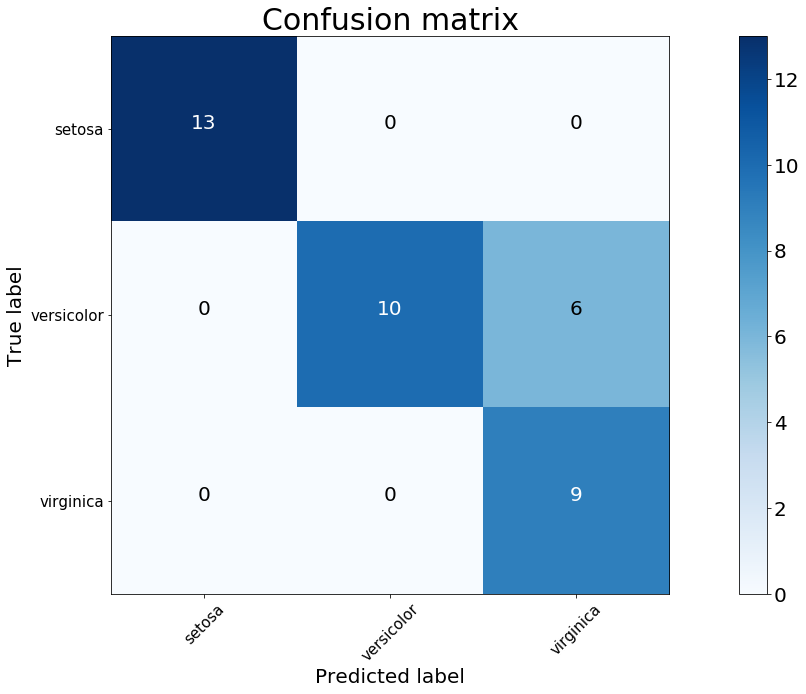

In [15]:
# show matplotlib figure inline
%matplotlib inline

# import packages
import itertools
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 20

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)
    plt.tick_params(axis='both', labelsize=15)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

plt.show()


#### Confusion Matrix visualization by yellowbrick:

Code modified from the official yellowbrick tutorial website

Link: http://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html

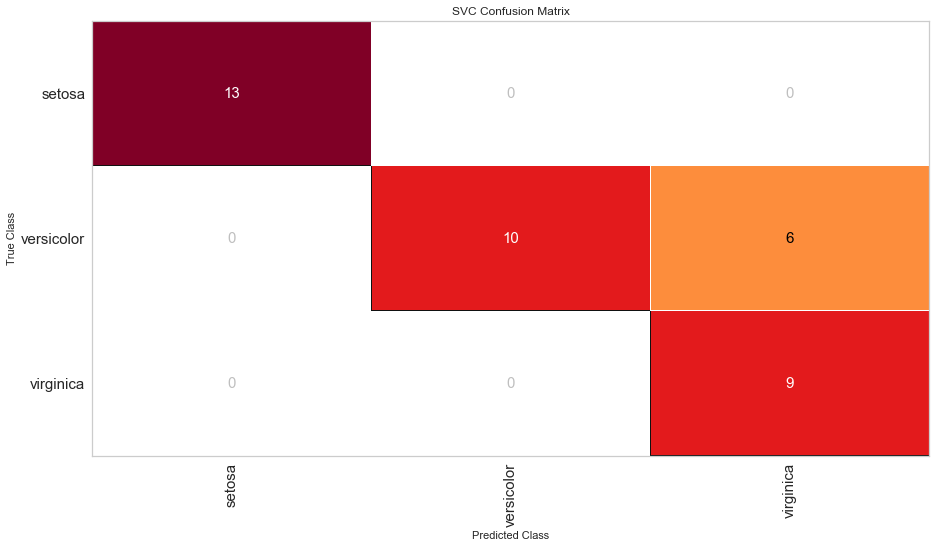

In [19]:
# import packages
import yellowbrick
from yellowbrick.classifier import ConfusionMatrix

# set up the figure size
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 15

#The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(classifier)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

#How did we do?
cm.poof()

## References:
[1] https://en.wikipedia.org/wiki/Python_(programming_language)   
[2] https://en.wikipedia.org/wiki/R_(programming_language)   
[3] http://shiny.rstudio.com/  
[4] https://www.kdnuggets.com/2017/09/python-vs-r-data-science-machine-learning.html  
[5] https://www.kdnuggets.com/2015/05/r-vs-python-data-science.html  
[6] https://www.kdnuggets.com/2017/02/python-deep-learning-frameworks-overview.html  